<a href="https://colab.research.google.com/github/brunofbpaula/IA-FIAP/blob/main/Aula/CheckpointUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHECKPOINT Chatbot&IA - Representação e extração de dados

Desenvolvido no Jupyter Notebook, pelo grupo FiveTech da 1TDSPW.



In [ ]:
# MEMBROS FIVETECH:
# RM 552226 BRUNO FRANCISCO BRITO DE PAULA
# RM 98676 EDWARD DE LIMA
# RM 99850 MIGUEL MARIO GRANITO
# RM 99866 PEDRO HENRIQUE CHERSONI LINS
# RM 550133 IAN NAVAS

## Leitura do arquivo de texto .TXT

In [ ]:
# 1.A) Encoding ISO-8859-1, LATIN-1 ou CP1252
with open('dataset/texto_checkpoint.txt', 'r', encoding='ISO-8859-1') as texto:
  linhas = texto.readlines()

# 1.B) Linha por linha
counter = 1
for linha in linhas:
  print(f'{counter}ª linha do texto: {linha}')
  counter += 1

# 1.C) Última linha
print(f'\nÚltima linha do arquivo: {linhas[-1]}')

1ª linha do texto: Faça as coisas o mais simples que você puder.

2ª linha do texto: Porém não se restrinja às mais simples.

3ª linha do texto: Albert Einstein.

Última linha do arquivo: Albert Einstein.


## Leitura do arquivo de imagem .PNG

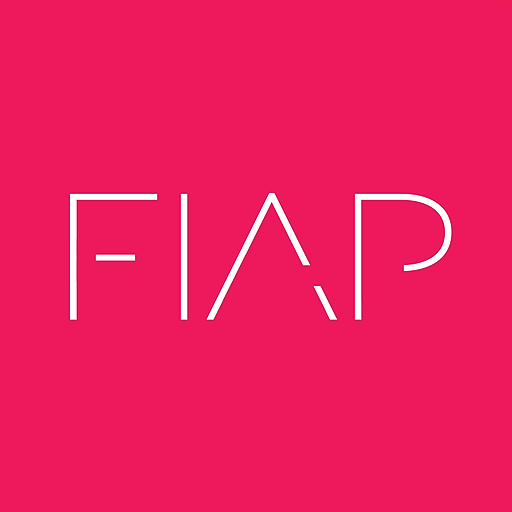

In [ ]:
from PIL import Image
from IPython.display import display

# 2.A) Printando imagem
img = Image.open('dataset/imagem_check.png')
display(img)

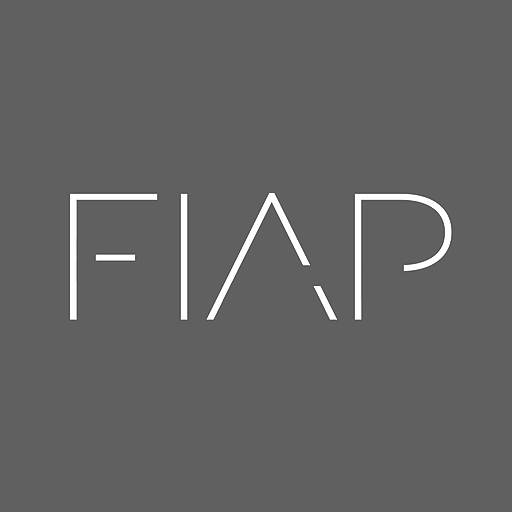

In [ ]:
  # 2.B) Acinzentado a imagem
  img_cinza = img.convert("L")
  img_cinza

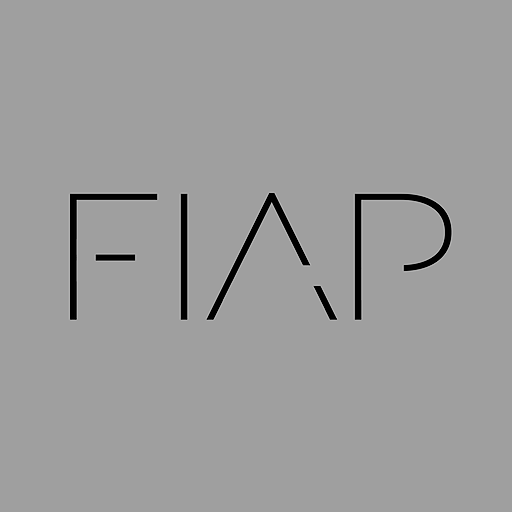

In [ ]:
# 2.C) Deixando a imagem negativa
import numpy as np

# Tornando a imagem cinza em um array
img_array = np.array(img_cinza)

# Quando armazenados, cada valor é do tipo unit8 (integers sem sinal),
# armazenados de 0 (preto) a 255 (branco)

# Mask branca
mask = np.full(img_array.shape, 255)

# Retirando todo o branco da imagem e definindo o tipo do array pra uint8
img_negativa = img_array - mask
img_negativa = img_negativa * -1  # Valores positivados
img_negativa = img_negativa.astype(np.uint8)

# Transformar em imagem novamente
display(Image.fromarray(img_negativa))

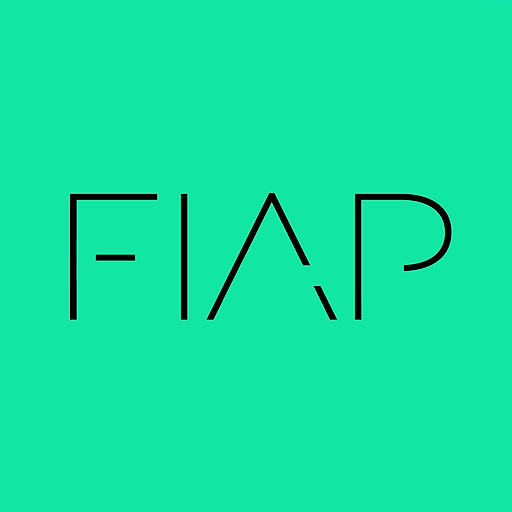

In [ ]:
# Fazendo o mesmo com a imagem original
# Percorrendo cada pixel e pegando os valores r,g e b para subtrair do branco
for x in range(0, img.size[0]):
  for y in range(0, img.size[1]):
    pixels = img.getpixel((x, y))
    r = 255 - pixels[0]
    g = 255 - pixels[1]
    b = 255 - pixels[2]

    # Juntando tudo
    img.putpixel((x,y), (r, g, b))

img

## Grafo

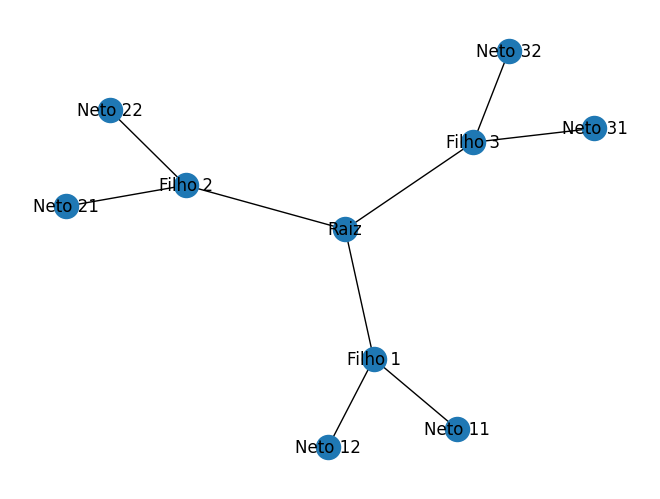

In [ ]:
# 3) Grafo em árvore com 1 raiz e 3 filhos com 2 filhos cada
import networkx as nx
import matplotlib.pyplot as plt

# Grafo
grafo = nx.Graph()
grafo.add_nodes_from(['Raiz', 'Filho 1', 'Filho 2', 'Filho 3',
                      'Neto 11', 'Neto 12', 'Neto 21', 'Neto 22', 'Neto 31', 'Neto 32'])

# Vértices (edges)
grafo.add_edges_from([('Raiz', 'Filho 1'), ('Raiz', 'Filho 2'), ('Raiz', 'Filho 3'),
                      ('Filho 1', 'Neto 11'), ('Filho 1', 'Neto 12'), ('Filho 2', 'Neto 21'),
                      ('Filho 2', 'Neto 22'), ('Filho 3', 'Neto 31'), ('Filho 3', 'Neto 32')])

# Plotando
nx.draw(grafo, with_labels=True, arrows=False)

## Leitura arquivo de som

In [ ]:
# 5.A) Leitura do aúdio
import librosa as lb
import librosa.display as lbd
import matplotlib.pyplot as plt
import IPython

sinal, sr = lb.load('/content/dataset/audio_check.wav', sr=None)
sinal

array([-0.00076294, -0.00085449, -0.00079346, ..., -0.00036621,
       -0.0005188 , -0.00042725], dtype=float32)

In [ ]:
# 5.B) Apresentação do aúdio
# Aúdio
IPython.display.Audio('/content/dataset/audio_check.wav')

Text(22.347222222222214, 0.5, 'Amplitude (a.u.)')

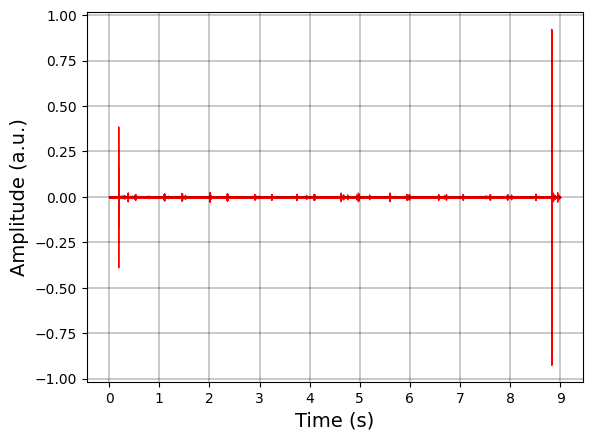

In [ ]:
# Gráfico
lb.display.waveshow(sinal, sr=sr,color='r')
plt.grid(color='k', linestyle='-', linewidth=0.3)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14)

In [87]:
# 5.C) Média aritmética, média geométrica, média ponderada, média harmônica, mediana,
# moda, variância amostral e desvio padrão.
from collections import defaultdict
from collections import Counter

# Média aritmética
m_arit = lambda x: sum(x)/len(x)

# Média geométrica
m_geo1 = lambda x: sum(map(lambda y: y**0.5, x))
# Nesse caso, matematicamente falando, elevar um número real a
# potência de um número negativo não garante uma solução significativa
# no domínio dos números reais. Como a solução de (-x)**0.5 só existe entre
# os números complexos, o numpy retorna um aviso e um NaN como resultado.
def m_geo2(x):
  x = x.astype('complex128')
  resultado = lambda x: sum(map(lambda y: y**0.5, x))
  return resultado(x)
# Mesmo utilizando a função powder da biblioteca numpy, uma solução concreta é
# impossível sem setar o dtype do array pra np.complex128.

# Média ponderada
def m_pon(x):

  # Agrupando os valores iguais
  grupos = defaultdict(list)
  for n in x:
    grupos[n].append(n)

  # Calculando a média ponderada
  numerador = 0
  denominador = 0

  for valor in grupos.keys():
    denominador += len(grupos[valor])
    numerador += float(valor)*denominador

  return numerador/denominador

# Média harmônica
def m_har(x):
  numerador = len(x) - (len([x for x in sinal if x == 0])) # Total de zeros
  denominador = 0
  for n in x:
    if n != 0:  # Valores zero que serão descontados (não podem dividir)
      denominador += 1/n
  return numerador / denominador

# Mediana
def m_med(x):
  length = len(x)
  x.sort()
  if length % 2 == 0:  # Caso o array tenha comprimento par
      med1 = x[length//2]
      med2 = x[length//2 - 1]
      med = (med1 + med2)/2
  else:  # Caso o comprimento seja ímpar
      med = x[length//2]
  return med

# Moda
def m_moda(x):
  # Agrupando os valores iguais
  grupos = defaultdict(list)
  for n in x:
    grupos[n].append(n)

  # Declarando moda como menos infinito
  moda = float('-inf')

  # Substituindo pelo valor com mais ocorrência
  for valor in grupos.keys():
    if len(grupos[valor]) > moda:
      moda = valor

  return moda

# Variância amostral
def v_am(x):
  # Somatória de tudo ao elevado quadrado unitariamente
  x = x.astype('complex128')
  soma1 = lambda x: sum(map(lambda y: y**2, x))

  # Somatória de tudo elevado ao quadrado
  soma2 = sum(x)**2

  # Fórmula
  resultado = (soma1(x) - soma2)/(len(x) - 1)
  return resultado

# Desvio padrão
d_pad = lambda x: v_am(x) ** 0.5

In [88]:
resultados = {
    'Média Aritmética': m_arit(sinal),
    'Média Geométrica': m_geo2(sinal),
    'Média Ponderada': m_pon(sinal),
    'Média Hârmonica': m_har(sinal),
    'Mediana': m_med(sinal),
    'Moda': m_moda(sinal),
    'Variância Amostral': v_am(sinal),
    'Desvio Padrão': d_pad(sinal)
}

for formula, resultado in resultados.items():
  print(f'{formula}: {resultado}')

Média Aritmética: -3.152329725292895e-06
Média Geométrica: (5161.016523767249+5179.550428960448j)
Média Ponderada: 68.0954695257416
Média Hârmonica: -0.03383534126125614
Mediana: 0.0
Moda: 0.924560546875
Variância Amostral: (9.604764344437688e-05+0j)
Desvio Padrão: (0.009800389963893116+0j)
